# Regression Example
Our dataset is a collection of houses for sale, we want to estimate the price of a house given its features. This is a regression example because the price target can be a continuous value that we want to estimate. Unlike classification, where we want to categorize into targets.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_recall_fscore_support

These are imports we need for the program. We use sklearn linear model set for regression.

In [2]:
frame = pd.read_csv('house-prices.csv')
del frame['Home']
frame.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


First step is always checking the dataset. We can see that we had a feature called "*Home*" which was redundant indexing for the table, so we dropped it. There are also string features, which causes an error while training with **sklearn**, so first order is to replace these strings with respective numeric value for training.

**Pandas** does this by taking in a *dictionary* to replace the value forexample: "No": 0, "Yes": 1, will replace no/yes with 0/1

In [3]:
frame = frame.replace({"Brick": {"No": 0, "Yes": 1}}).replace({"Neighborhood": {"North": 0, "East": 1, "West": 2, "South": 3}})

It is also good practice to visualize data before training so we have an idea of how different features affect the target

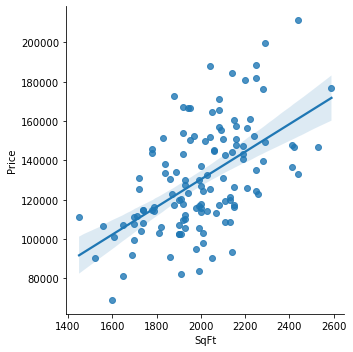

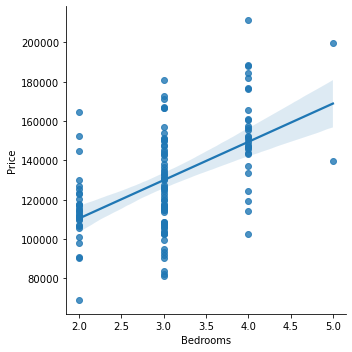

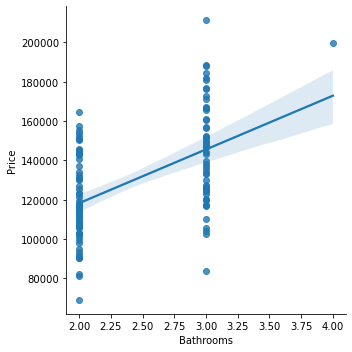

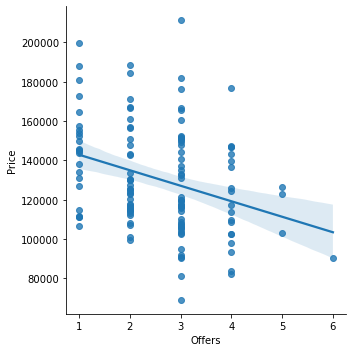

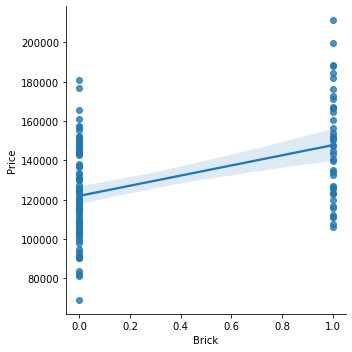

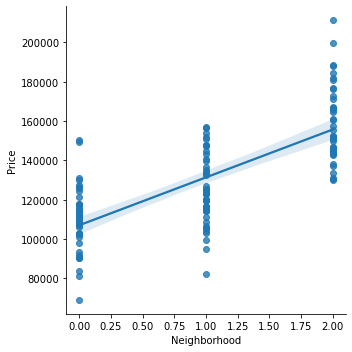

In [4]:
for x in frame.columns[1:]:
    sns.lmplot(y="Price", x=x, data=frame)
    plt.show()

Every feature except *Offers* has a positive correlation with Price. Remember that we replaced string values with numbers so if you didn't read the previous cell it won't make sense.

In [5]:
X = frame.drop('Price', axis=1)
y = frame['Price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

This is splitting the data into training and testing, default practice is 70/30% split for training/testing. We dropped the target column in X in the previous cell, because we don't know the price while training, we would drop what we hope to predict. And Y would be what we want to predict.

In [7]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

Just with 1 library call sklrean will fit your data into a model that you will make predictions with. Notice that you pass in training data.

In [8]:
predictions = lrm.predict(X_test)
print("TEST: ###")
print("MeanSquare Error: {:.2f}".format(mean_squared_error(y_test, predictions)))
print("Mean Abs Error: {:.2f}".format(mean_absolute_error(y_test, predictions)))
print("Score: {:.2f}".format(lrm.score(X_test, y_test)))

predictions = lrm.predict(X_train)
print("TRAIN: ###")
print("MeanSquare Error: {:.2f}".format(mean_squared_error(y_train, predictions)))
print("Mean Abs Error: {:.2f}".format(mean_absolute_error(y_train, predictions)))
print("Train Set Score: {:.2f}".format(lrm.score(X_train, y_train)))

TEST: ###
MeanSquare Error: 148704589.81
Mean Abs Error: 9188.08
Score: 0.69
TRAIN: ###
MeanSquare Error: 122032546.51
Mean Abs Error: 9147.24
Train Set Score: 0.84


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

*.predict* gives you the predictions of a test set you pass. score is the coefficient of determination of the prediction, it can be at most 1.0, the closer the better, but it can be much worse. MSE and AbsE are some statistic error calculating functions, AbsE gives the mean absolute error which can be pretty descriptive, 12k mean error is an eye-opener because it accounts for around 8% of general house prices in the dataset.

Prediction: 121790.2827131121, actual: 126300, offset: 4509.717286887899
Prediction: 122053.80145124518, actual: 114800, offset: 7253.801451245177
Prediction: 108117.09818960368, actual: 106900, offset: 1217.0981896036828
Prediction: 119671.56333986104, actual: 126200, offset: 6528.436660138963
Prediction: 162086.87372699287, actual: 160600, offset: 1486.873726992868
Prediction: 113374.23543187449, actual: 105600, offset: 7774.235431874491
Prediction: 108351.00581358596, actual: 103200, offset: 5151.005813585958
Prediction: 85731.0731941306, actual: 90300, offset: 4568.9268058694
Prediction: 170259.69205873483, actual: 184300, offset: 14040.307941265171
Prediction: 97301.43883203699, actual: 91100, offset: 6201.438832036991


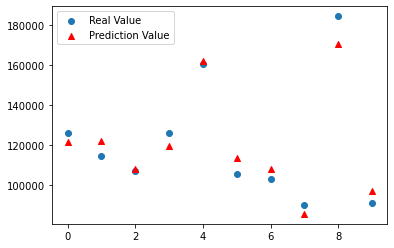

In [ ]:
a = []
p = []
for i in range(10):
    r = frame.sample()
    rp = lrm.predict(r.drop('Price', axis=1))
    rv = r['Price'].to_list()[0]
    print("Prediction: {}, actual: {}, offset: {}".format(rp[0], rv, abs(rv - rp[0])))
    a.append(rv)
    p.append(rp[0])

plt.scatter(x=np.arange(10), y=a, marker='o', label='Real Value')
plt.scatter(x=np.arange(10), y=p, marker='^', c='r', label='Prediction Value')
plt.legend()
plt.show()

Now lastly we should sample and see how the model performs visually. To do this it easy to use scatter plot and compare our prediction with real values.

You can see that some values are very close or even laying on top of each other, while some are a few 10k apart, here is where you would consider optimizing your model with preprocessing or weighting features.